## Linear Regression


Linear regresion is used for finding relationship between target and one or more predictors. There are two types of linear regression. Simple and multiple

### Regression : real valued output
### Classification : Discrete Valued (0/1), Outputs the classesin which given example belongs

Consider an equation X - Y = 0   
We know the graph for this equation is strainght line passing througn origin
From given equation X = Y   
Let we given some values of X and we need to find the values of Y    
From given equation we can easily gat the values of Y    
So Linear Regression is an Algorithm in which we will teach machine how to predict values    
Example :- We have the data of the houses in square feet and we need to tell the price of the house 

In [118]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [88]:
path = r"D:\Board Infinity\Practice DATA\Admission_Predict.csv"
data = pd.read_csv(path)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [89]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [123]:
data["Total"] = preprocessing.scale(data["GRE Score"] * data["TOEFL Score"] * data["CGPA"])


In [124]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.977937
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.285063
2,3,316,104,3,3.0,3.5,8.00,1,0.72,-0.705150
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.275875
4,5,314,103,2,2.0,3.0,8.21,0,0.65,-0.647064


In [153]:
data1 = data[["Total", "Chance of Admit "]]
data1.columns = ["Total" ,"Admit_Probability"]

In [154]:
data1.head()

,Total,Admit_Probability
0,1.977937,0.92
1,0.285063,0.76
2,-0.705150,0.72
3,0.275875,0.80
4,-0.647064,0.65


In [155]:
data1.describe()

,Total,Admit_Probability
count,4.000000e+02,400.000000
mean,4.451994e-16,0.724350
std,1.001252e+00,0.142609
min,-2.156945e+00,0.340000
25%,-6.910511e-01,0.640000
50%,-1.142909e-01,0.730000
75%,6.791987e-01,0.830000
max,2.444121e+00,0.970000


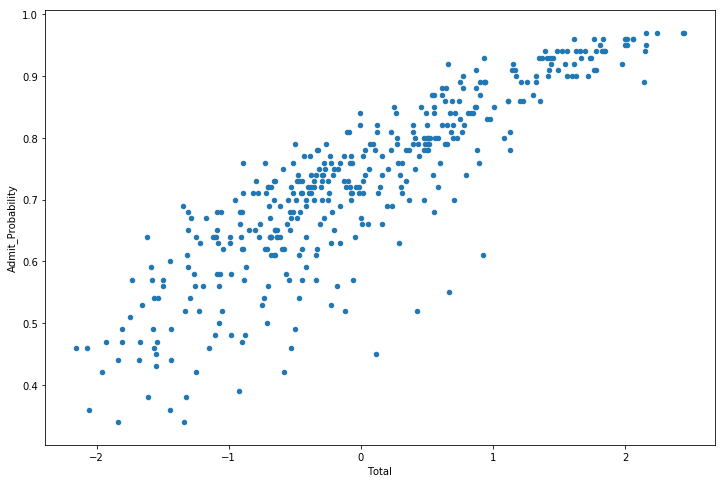

In [157]:
data1.plot(kind = "scatter", x = "Total", y = "Admit_Probability", figsize = (12, 8) )

In [158]:
theta = np.matrix(np.array([0, 0]))

In [159]:
theta

matrix([[0, 0]])

In [160]:
theta.shape

(1, 2)

In [161]:
data1.insert(0, "ones", 1)

In [162]:
data1.head()

,ones,Total,Admit_Probability
0,1,1.977937,0.92
1,1,0.285063,0.76
2,1,-0.705150,0.72
3,1,0.275875,0.80
4,1,-0.647064,0.65


In [163]:
cols = data1.shape[1]

In [164]:
cols

3

In [165]:
X = data1.iloc[:, 0 : cols - 1]
#sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X.head()

,ones,Total
0,1,1.977937
1,1,0.285063
2,1,-0.705150
3,1,0.275875
4,1,-0.647064


In [166]:
y = data1.iloc[:, cols -1 : cols]
y.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [167]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [168]:
X.shape, theta.shape, y.shape

((400, 2), (1, 2), (400, 1))

In [169]:
theta = np.matrix(np.array([0,0]))

In [170]:
def computecost(X, y, theta):
    inner = np.power((np.dot(X, theta.T) - y), 2)
    suminner = np.sum(inner)
    return suminner/(2*len(X))

In [171]:
computecost(X, y, theta)

0.27248475

In [172]:
def gradient(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameter=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range(parameter):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]=computecost(X,y,theta)
    return theta,cost

In [173]:
alpha = 0.5
iters = 800
theta, cost = gradient(X, y, theta, alpha, iters)

In [174]:
theta

matrix([[0.72435   , 0.12467521]])

In [175]:
cost.shape

(800,)

In [176]:
computecost(X, y, theta)

0.0023713352045400637

In [177]:
x = np.linspace(data1.Total.min(), data1.Total.max(), 100)

In [178]:
y_pred = theta[0, 0] + (theta[0, 1] * x)

Text(0, 0.5, 'Admit_Probability')

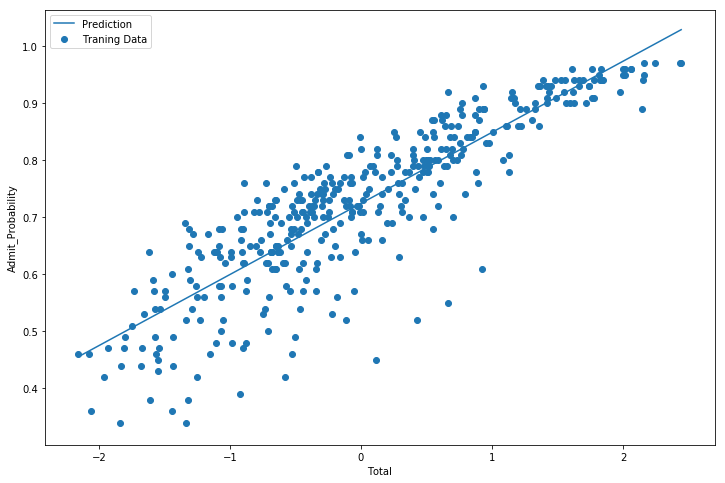

In [180]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, y_pred, label='Prediction')  
ax.scatter(data1.Total, data1.Admit_Probability ,label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Total')  
ax.set_ylabel('Admit_Probability')